# Training a Convolutional Neural Network to distinguish 123 different category of doodles - v6

### Training on 4920 images from each category and testing on 1080 images from each 123 categories

In [1]:
! git clone https://github.com/jp-test-account/dataset.git

Cloning into 'dataset'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 127 (delta 36), reused 127 (delta 36), pack-reused 0
Receiving objects: 100% (127/127), 189.00 MiB | 27.11 MiB/s, done.
Resolving deltas: 100% (36/36), done.
Checking out files: 100% (124/124), done.


In [3]:
! cd dataset && ls

dataset-6000  npy-to-png.py


In [4]:
! cd dataset && python npy-to-png.py dataset-6000 6000

Pulling 6000 images from see_saw.npy... Done
Pulling 6000 images from cup.npy... Done
Pulling 6000 images from zigzag.npy... Done
Pulling 6000 images from airplane.npy... Done
Pulling 6000 images from sea_turtle.npy... Done
Pulling 6000 images from eye.npy... Done
Pulling 6000 images from ceiling_fan.npy... Done
Pulling 6000 images from hammer.npy... Done
Pulling 6000 images from face.npy... Done
Pulling 6000 images from saw.npy... Done
Pulling 6000 images from tiger.npy... Done
Pulling 6000 images from cruise ship.npy... Done
Pulling 6000 images from duck.npy... Done
Pulling 6000 images from wheel.npy... Done
Pulling 6000 images from pencil.npy... Done
Pulling 6000 images from apple.npy... Done
Pulling 6000 images from necklace.npy... Done
Pulling 6000 images from key.npy... Done
Pulling 6000 images from scissors.npy... Done
Pulling 6000 images from lion.npy... Done
Pulling 6000 images from sandwich.npy... Done
Pulling 6000 images from mosquito.npy... Done
Pulling 6000 images from bea

In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

from keras.layers import Dense
from keras.layers import Dropout

import numpy as np


# the cnn architecture defined as follows
classifier = Sequential()

# first conv layer
classifier.add(Convolution2D(
        input_shape=(28,28,1),
        filters=16,
        kernel_size=(3,3),
        activation='relu',
        kernel_initializer='uniform'))

# max pooling layer
classifier.add(MaxPooling2D(
        pool_size=(2,2),
        strides=(2,2)))

# second conv layer
classifier.add(Convolution2D(
        filters=16,
        kernel_size=(3,3),
        activation='relu',
        kernel_initializer='uniform'))

# max pooling layer
classifier.add(MaxPooling2D(
        pool_size=(2,2),
        strides=(2,2)))

# flattening for feeding the data to a fully connected artificial neural network
classifier.add(Flatten())

# first hidden layer
classifier.add(Dense(units=256, activation='relu', kernel_initializer='uniform'))
classifier.add(Dropout(rate=0.5))

# output layer
classifier.add(Dense(units=123, activation='softmax', kernel_initializer='uniform'))

# compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [2]:
# well... after rescaling (dividing by 255), if pixel value is less than 0.3 the consider a black pixel otherwise a white one
def preprocessing(img):
    img = img/255
    return np.where(img < 0.3, 0, 1)

# image preprocessing before feeding into the CNN
from keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(preprocessing_function=preprocessing, validation_split=0.18)

# training data set
train_set = data_generator.flow_from_directory(
        'dataset/dataset-6000/',
        batch_size=32,
        target_size=(28,28), color_mode='grayscale', subset='training')

# testing/validation data set
test_set = data_generator.flow_from_directory(
        'dataset/dataset-6000/',
        batch_size=32,
        target_size=(28,28), color_mode='grayscale', subset='validation')

Found 605160 images belonging to 123 classes.
Found 132840 images belonging to 123 classes.


In [5]:
open('class_indices', 'w').write(str(train_set.class_indices))

1809

### Epoch 1 - 5

In [10]:
# finally fitting the data and training the CNN
history = classifier.fit_generator(
        epochs=5,
        initial_epoch=0,
        generator=train_set,
        steps_per_epoch=18911,
        validation_data=test_set,
        validation_steps=4151,
        use_multiprocessing=True)

Epoch 1/5
18911/18911 [==============================] - 324s 17ms/step - loss: 2.3477 - acc: 0.4320 - val_loss: 1.5830 - val_acc: 0.6109
Epoch 2/5
18911/18911 [==============================] - 230s 12ms/step - loss: 1.9149 - acc: 0.5284 - val_loss: 1.4593 - val_acc: 0.6413
Epoch 3/5
18911/18911 [==============================] - 226s 12ms/step - loss: 1.8214 - acc: 0.5509 - val_loss: 1.3950 - val_acc: 0.6550
Epoch 4/5
18911/18911 [==============================] - 227s 12ms/step - loss: 1.7744 - acc: 0.5617 - val_loss: 1.3959 - val_acc: 0.6549
Epoch 5/5
18911/18911 [==============================] - 229s 12ms/step - loss: 1.7417 - acc: 0.5690 - val_loss: 1.3489 - val_acc: 0.6670


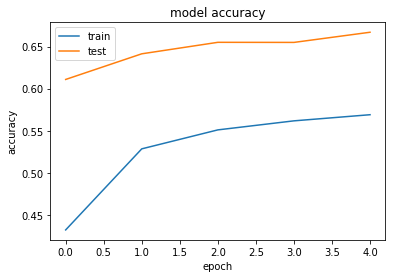

In [11]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
classifier.save('model-v6-28-123-6670.h5')

In [13]:
! ls -l --block-size=MB

total 2MB
-rw-r--r-- 1 root root 1MB Jun 20 03:45 class_indices
drwxr-xr-x 4 root root 1MB Jun 20 03:23 dataset
-rw-r--r-- 1 root root 2MB Jun 20 04:16 model-v6-28-123.h5
drwxr-xr-x 1 root root 1MB May 31 16:17 sample_data


### Epoch 0 - 10 - after initial training

In [14]:
history = classifier.fit_generator(
        epochs=10,
        initial_epoch=0,
        generator=train_set,
        steps_per_epoch=18911,
        validation_data=test_set,
        validation_steps=4151,
        use_multiprocessing=True)

Epoch 1/10
18911/18911 [==============================] - 234s 12ms/step - loss: 1.7228 - acc: 0.5732 - val_loss: 1.3442 - val_acc: 0.6679
Epoch 2/10
18911/18911 [==============================] - 231s 12ms/step - loss: 1.7063 - acc: 0.5769 - val_loss: 1.3226 - val_acc: 0.6721
Epoch 3/10
18911/18911 [==============================] - 229s 12ms/step - loss: 1.6909 - acc: 0.5808 - val_loss: 1.3146 - val_acc: 0.6740
Epoch 4/10
18911/18911 [==============================] - 230s 12ms/step - loss: 1.6808 - acc: 0.5834 - val_loss: 1.3006 - val_acc: 0.6773
Epoch 5/10
18911/18911 [==============================] - 231s 12ms/step - loss: 1.6766 - acc: 0.5844 - val_loss: 1.3003 - val_acc: 0.6787
Epoch 6/10
18911/18911 [==============================] - 230s 12ms/step - loss: 1.6712 - acc: 0.5867 - val_loss: 1.3116 - val_acc: 0.6735
Epoch 7/10
18911/18911 [==============================] - 228s 12ms/step - loss: 1.6650 - acc: 0.5874 - val_loss: 1.3020 - val_acc: 0.6775
Epoch 8/10
18911/18911 [===

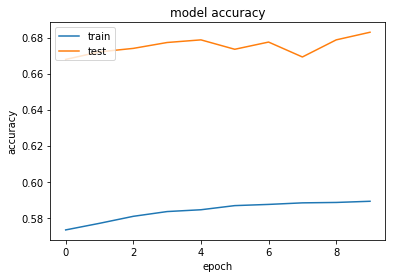

In [15]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
classifier.save('model-v6-28-123-6829.h5')